# Finding the mjor descriptors of species networks

Tanya Strydom [](https://orcid.org/0000-0001-6067-1349) (School of Biosciences, University of Sheffield, Sheffield, UK)  
Andrew P. Beckerman [](https://orcid.org/0000-0002-7859-8394) (School of Biosciences, University of Sheffield, Sheffield, UK)  
December 8, 2025

TODO

Blah blah blah @vermaatMajorDimensionsFoodweb2009

*“It is incumbent on network ecologists to establish clearly the independence and uniqueness of the descriptive metrics used.”* - @lauEcologicalNetworkMetrics2017

| Label | Definition | “Function” | Reference (for maths), can make footnotes probs |
|-----------------|-----------------------|-----------------|-----------------|
| Basal | Percentage of basal taxa, defined as species who have a vulnerability of zero |  |  |
| Connectance | $L/S^2$, where $S$ is the number of species and $L$ the number of links |  |  |
| Cannibal | Percentage of species that are cannibals |  |  |
| ChLen | Mean food chain length, averaged over all species (where a food chain is defined as a continuous path from a ‘basal’ to a ‘top’ species) |  |  |
| ChSD | Standard deviation of ChLen |  |  |
| ChNum | log number of food chains |  |  |
| Clust | mean clustering coefficient (probability that two taxa linked to the same taxon are also linked) |  | **TODO** |
| GenSD | Normalized standard deviation of generality of a species standardized by $L/S$ |  | @williamsSuccessItsLimits2008a |
| Herbivore | Percentage of herbivores plus detritivores (taxa that feed only on basal taxa) |  |  |
| Intermediate | Percentage of intermediate taxa (with both consumers and resources) |  |  |
| LinkSD | Normalized standard deviation of links (number of consumers plus resources per taxon) |  |  |
| Loop | Percentage of taxa in loops (food chains in which a taxon occurs twice) |  |  |
| L/S | links per species |  |  |
| MaxSim | Mean of the maximum trophic similarity of each taxon to other taxa, the number of predators and prey shared by a pair of species divided by their total number of predators and prey |  | **TODO** |
| Omnivory | Percentage of omnivores (taxa that feed on $\geq$ 2 taxa with different trophic levels) |  |  |
| Path | characteristic path length, the mean shortest food chain length between species pairs |  |  |
| Richness | Number of nodes in the network |  |  |
| TL | Prey-weighted trophic level averaged across taxa |  | @williamsLimitsTrophicLevels2004 |
| Top | Percentage of top taxa (taxa without consumers) |  |  |
| VulSD | Normalized standard deviation of vulnerability of a species standardized by $L/S$ |  |  |
| Links | The number of links in the network |  |  |
| Diameter | Diameter can also be measured as the average of the distances between each pair of nodes in the network |  | @delmasAnalysingEcologicalNetworks2019 |
| $\rho$ | Spectral radius is a a conceptual analog to nestedness (and more appropriate for unipartite networks). It is defined as the absolute value of the largest real part of the eigenvalues of the *undirected* adjacency matrix |  | @staniczenkoGhostNestednessEcological2013 |
| Complexity | SVD complexity of a network, defined as the Pielou entropy of its singular values | Something about structural v behavioural complexity being captured | @strydomSVDEntropyReveals2021 |
| Centrality | Centrality is a measure of how ‘influential’ a species is, under various definitions of ‘influence’… | Centrality can help in quantifying the importance of species in a network |  |
| S1 | Number of linear chains |  | @stoufferEvidenceExistenceRobust2007 @miloNetworkMotifsSimple2002 |
| S2 | Number of omnivory motifs |  | @stoufferEvidenceExistenceRobust2007 @miloNetworkMotifsSimple2002 |
| S4 | Number of apparent competition motifs |  | @stoufferEvidenceExistenceRobust2007 @miloNetworkMotifsSimple2002 |
| S5 | Number of direct competition motifs |  | @stoufferEvidenceExistenceRobust2007 @miloNetworkMotifsSimple2002 |
| Intervality | The degree to which the prey in a food web can be ordered so that all species can be placed along a single dimension |  | @stoufferRobustMeasureFood2006a |
| Prey:predator | Ratio of prey (basal + intermediate) to predators (top + intermediate) | A measure of food web ‘shape’. Values \<1 imply an inverted structure and might indicate instability |  |
| Robustness | Minimum level of secondary extinction that occurs in response to a particular perturbation |  | @jonssonReliabilityR50Measure2015 |

In [ ]:
library(knitr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Rows: 30 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Property, PCA 1 (30%), PCA 2 (21%), PCA 3 (17%)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

  Property        PCA 1 (30%)   PCA 2 (21%)   PCA 3 (17%)
  --------------- ------------- ------------- -------------
  richness        0.29          **0.82**      0.35
  links           0.63          **0.68**      0.1
  connectance     0.5           -0.5          -0.61
  diameter        0.55          0.47          0.35
  complexity      -0.48         -0.08         0.46
  distance        0.02          0.34          -0.11
  basal           -0.46         0.45          **-0.69**
  top             -0.56         0.17          0.28
  intermediate    **0.67**      -0.47         0.44
  predpreyRatio   -0.24         0.42          **-0.73**
  herbivory       -0.5          0.24          -0.06
  omnivory        **0.77**      -0.27         0.23
  cannibal        **0.73**      0.12          -0.29
  l_S             **0.83**      0.5           -0.13
  GenSD           -0.37         **0.67**      -0.32
  VulSD           -0.4          0.52          0.38
  TL              0.5           -0.41         **0.71**
  ChLen           0.48          -0.54         0.53
  ChSD            0.32          0.1           0.46
  ChNum           -0.19         **0.74**      0.48
  path            0.28          0.34          0.41
  LinkSD          -0.25         **0.68**      0.4
  S1              **0.92**      0.02          0.01
  S2              **0.85**      0.01          -0.35
  S4              0.62          0.53          -0.19
  S5              **0.67**      0.49          -0.42
  ρ               0.56          -0.3          -0.55
  centrality      -0.23         -0.63         -0.35
  loops           **0.81**      0.29          -0.05
  robustness      0.07          0.16          -0.51


<figure>
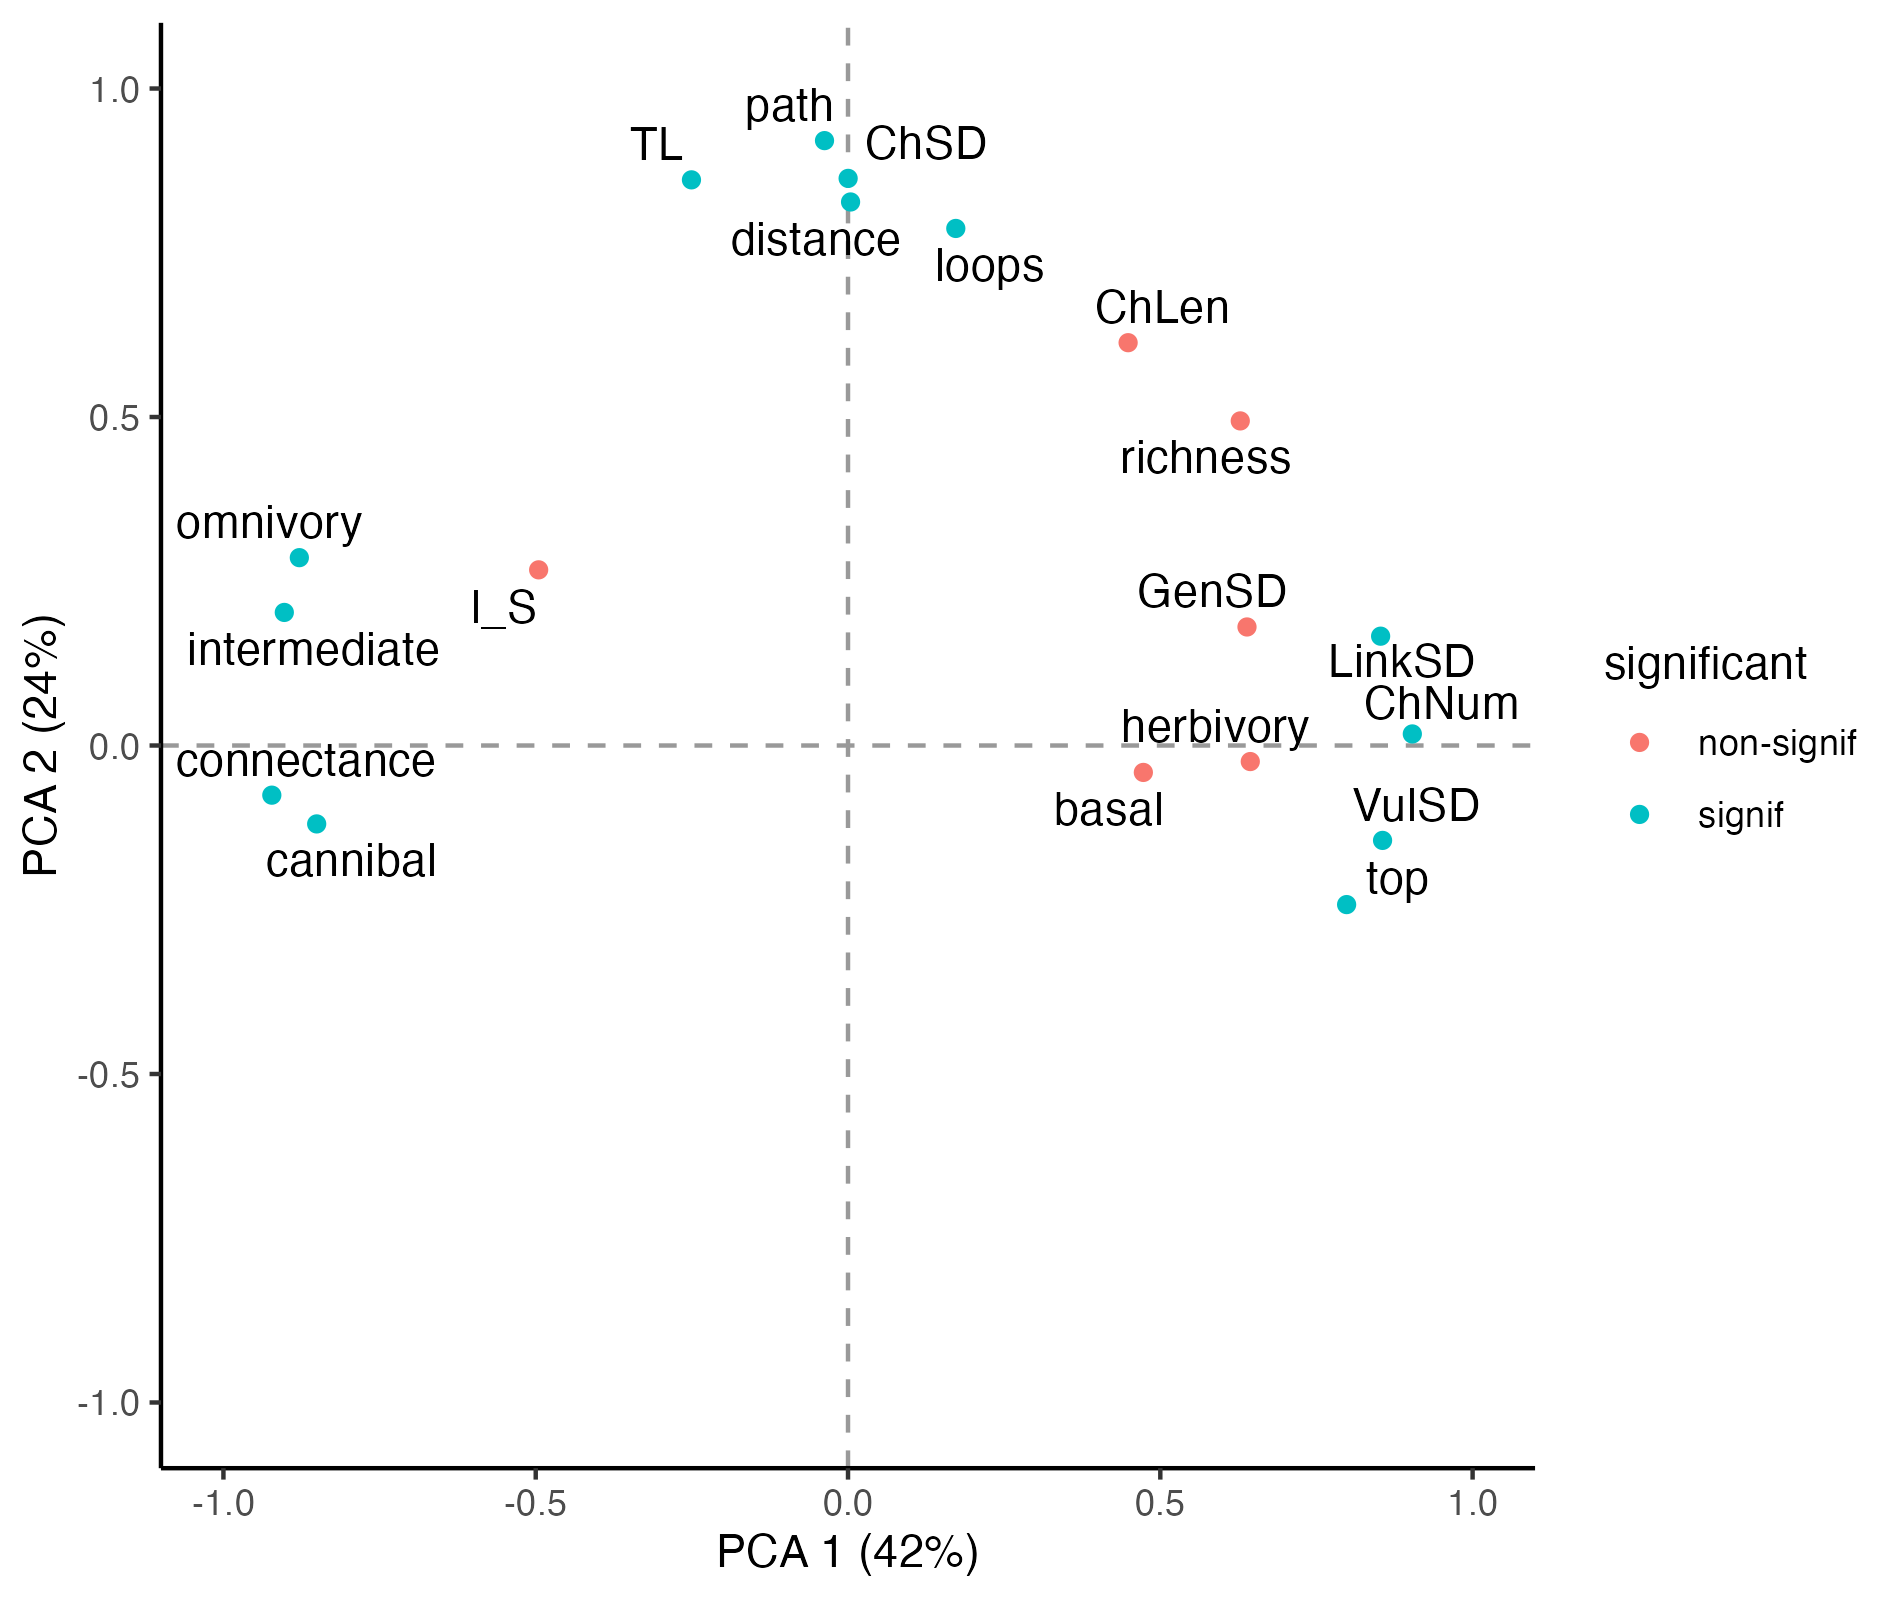
<figcaption aria-hidden="true">VERMAAT networks only</figcaption>
</figure>

<figure>
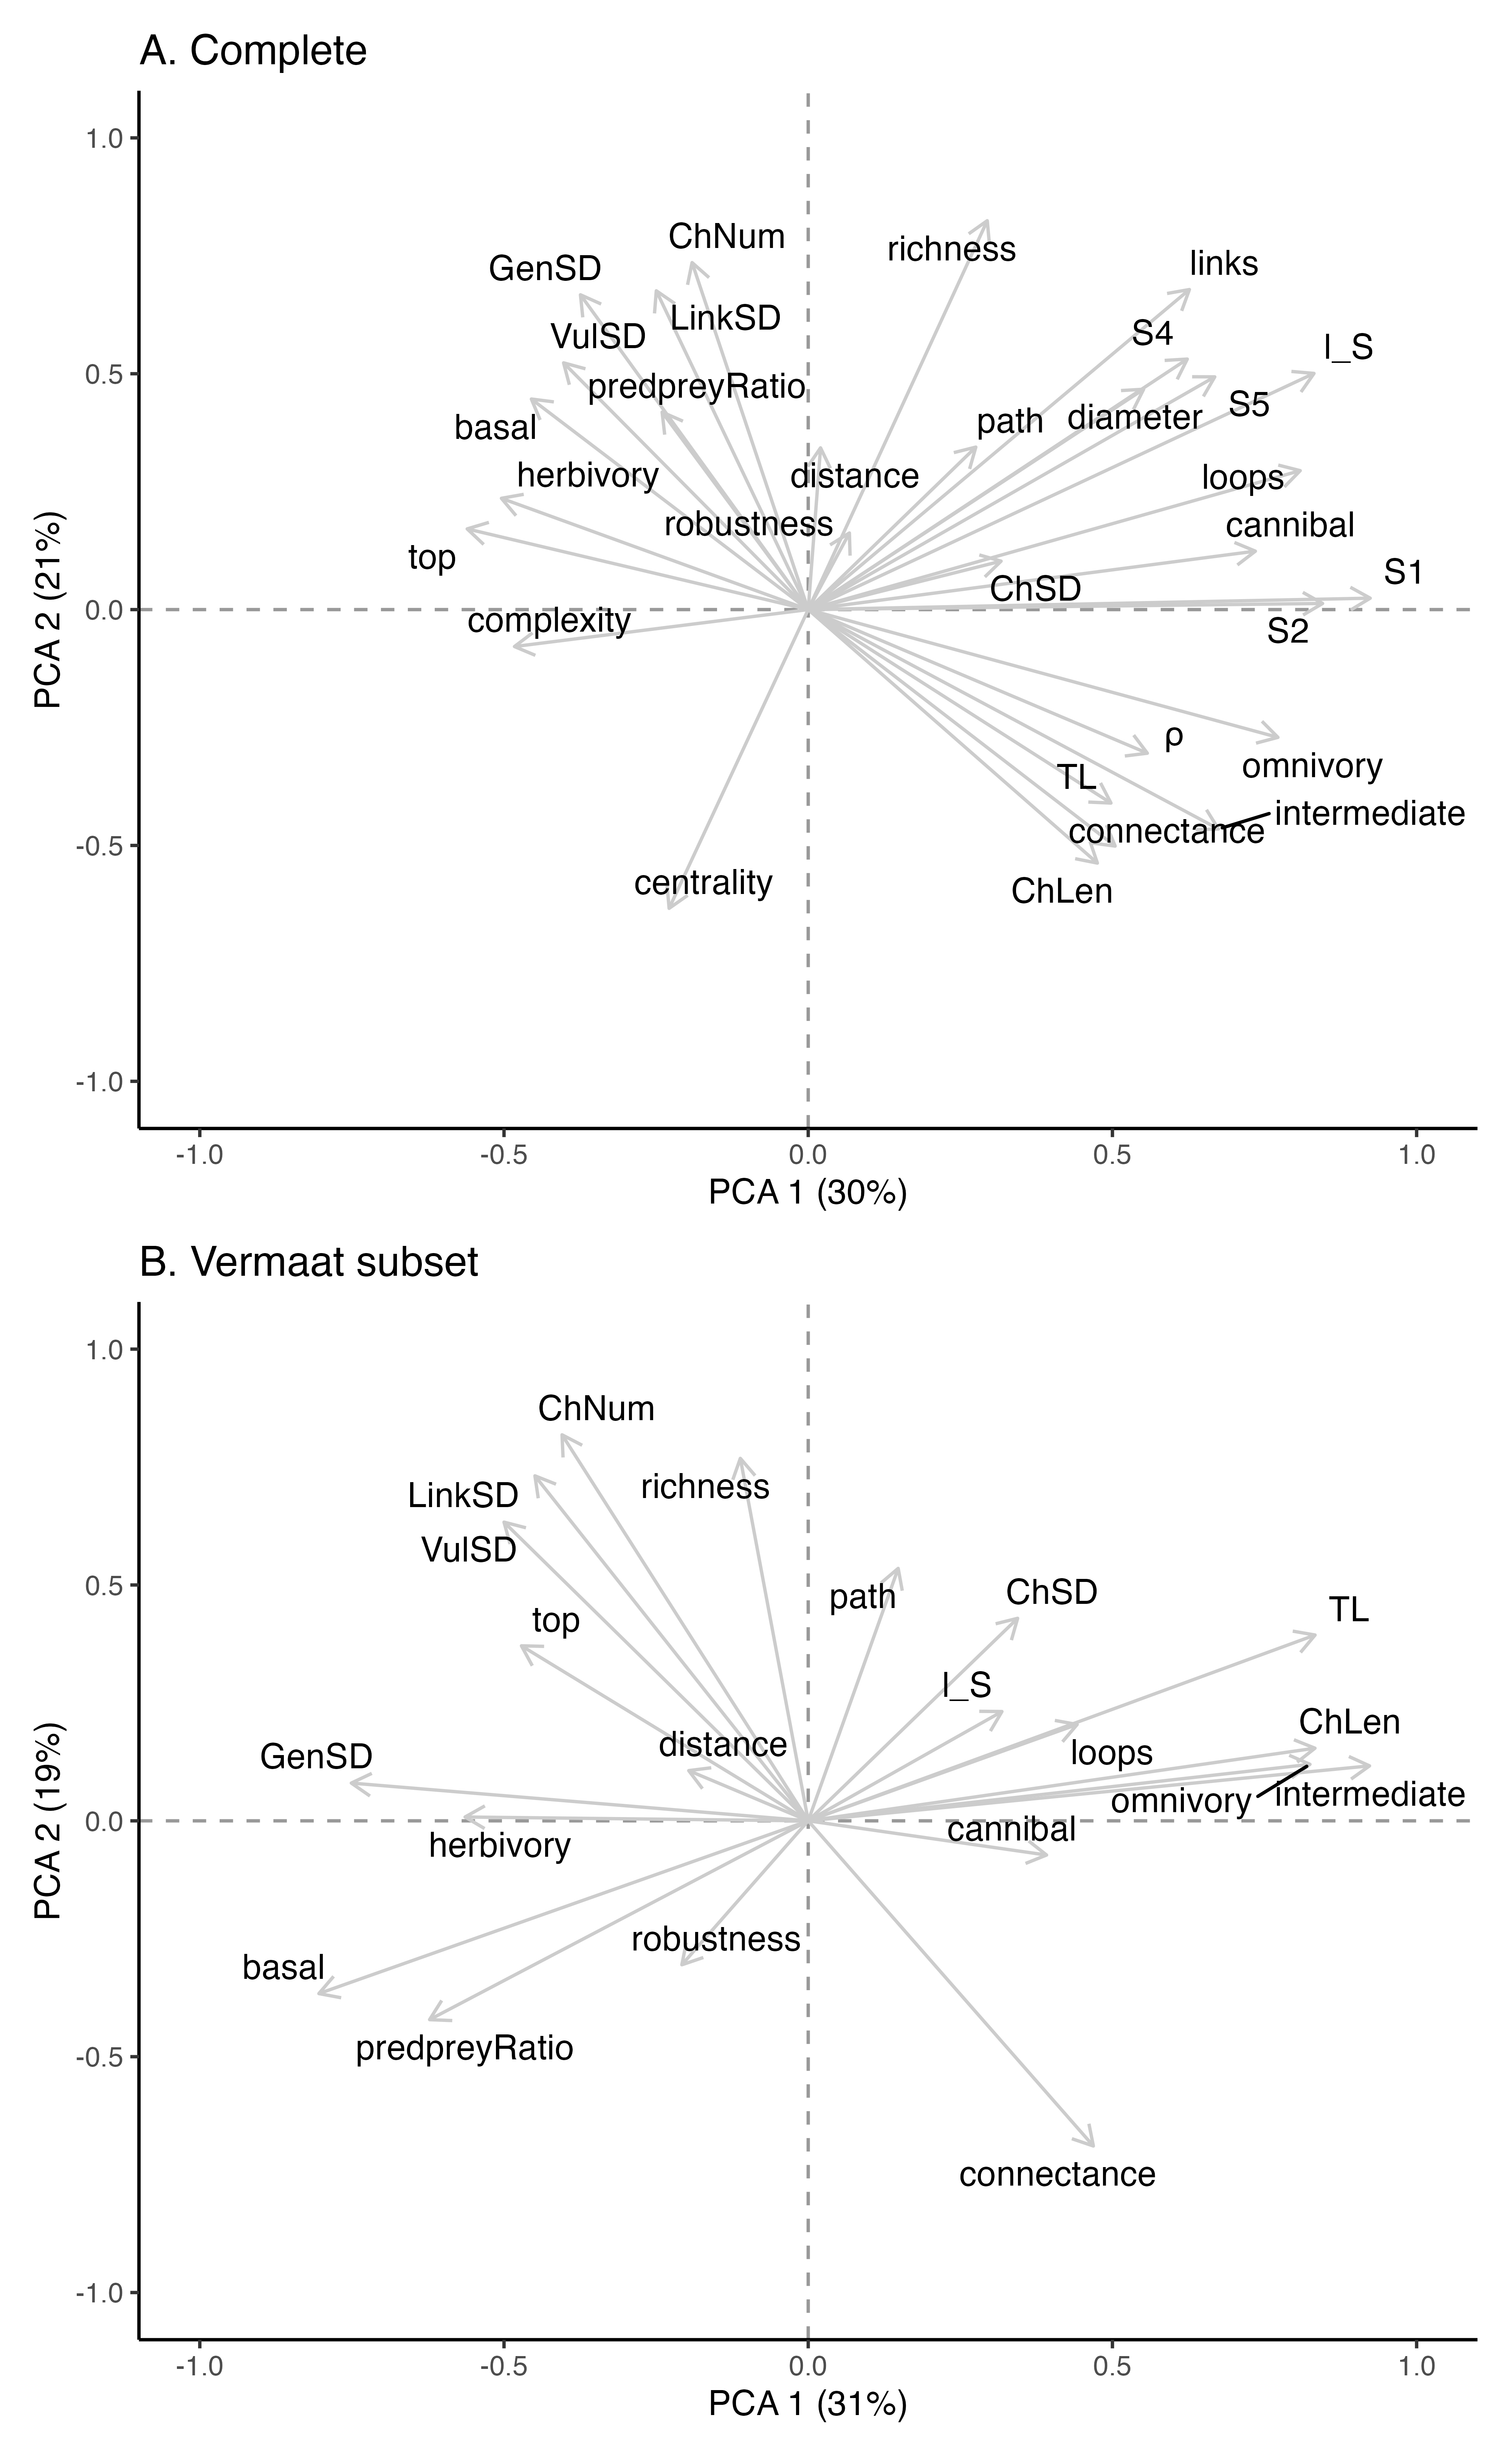
<figcaption aria-hidden="true">All networks. Vermaat subset = using only the structural measures from Vermaat</figcaption>
</figure>

# References